In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\churn_clean.csv')

In [3]:
#Drop columns we dont need, look for nulls/replace as needed.
df = df.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                      'Population', 'Area', 'TimeZone', 'Job', 'Email', 'Contacts', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                      'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                      'Tenure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'PaymentMethod', 'Marital'])
nulls = df.isnull().any()
print(nulls)

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
Children                False
Age                     False
Income                  False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Yearly_equip_failure    False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool


In [4]:
df.describe()

,CaseOrder,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,10.001848,0.398000,172.624816,3392.341550
std,2886.89568,2.1472,20.698882,28199.916702,2.976019,0.635953,42.943094,2185.294852
min,1.00000,0.0000,18.000000,348.670000,0.099747,0.000000,79.978860,155.506715
25%,2500.75000,0.0000,35.000000,19224.717500,8.018214,0.000000,139.979239,1236.470827
50%,5000.50000,1.0000,53.000000,33170.605000,10.018560,0.000000,167.484700,3279.536903
75%,7500.25000,3.0000,71.000000,53246.170000,11.969485,1.000000,200.734725,5586.141370
max,10000.00000,10.0000,89.000000,258900.700000,21.207230,6.000000,290.160419,7158.981530


In [5]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [6]:
print(df)


      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID  Children  Age    Income  Gender Churn  \
0     e885b299883d4f9fb18e39c75155d990         0   68  28561.99    Male    No   
1     f2d

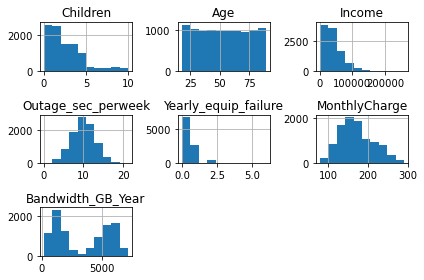

In [7]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge',
'Bandwidth_GB_Year']].hist()
plt.tight_layout()

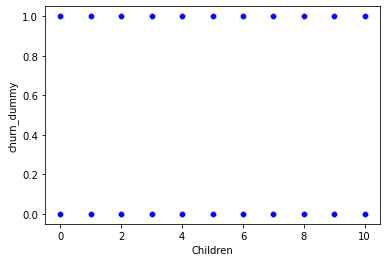

In [8]:
sns.scatterplot(x=df['Children'], y=df['churn_dummy'], color='blue')
plt.show();


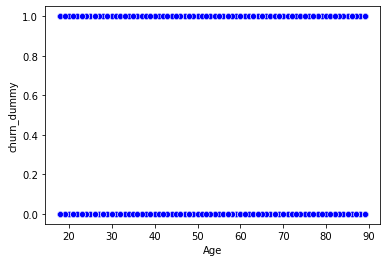

In [9]:
sns.scatterplot(x=df['Age'], y=df['churn_dummy'], color='blue')
plt.show();

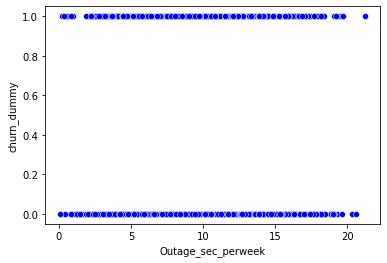

In [10]:
sns.scatterplot(x=df['Outage_sec_perweek'], y=df['churn_dummy'], color='blue')
plt.show();

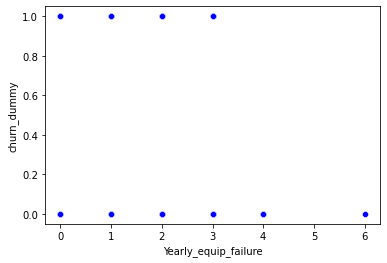

In [11]:
sns.scatterplot(x=df['Yearly_equip_failure'], y=df['churn_dummy'], color='blue')
plt.show();

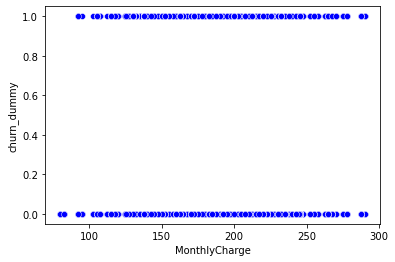

In [12]:
sns.scatterplot(x=df['MonthlyCharge'], y=df['churn_dummy'], color='blue')
plt.show();

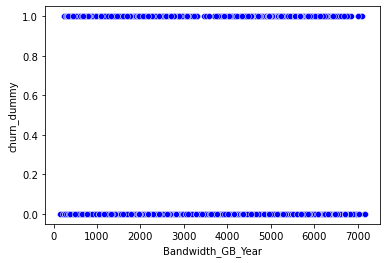

In [13]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], y=df['churn_dummy'], color='blue')
plt.show();

In [14]:
df['Intercept'] = 1
log_reg_results = sm.Logit(df['churn_dummy'], df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results.summary())

Optimization terminated successfully.
         Current function value: 0.357089
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3824
Time:                        12:18:04   Log-Likelihood:                -3570.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                 0.0170      0.014      1.211      0.226      -0.010       0.044

In [15]:
df['Intercept'] = 1
log_reg_results2 = sm.Logit(df['churn_dummy'], df[['MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'Intercept']]).fit()
print(log_reg_results2.summary())

Optimization terminated successfully.
         Current function value: 0.357282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:                  0.3821
Time:                        12:18:04   Log-Likelihood:                -3572.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
MonthlyCharge         0.0342      0.001     38.701      0.000       0.032       0.036
Bandwidt

In [16]:
df.to_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')

In [17]:
newdf = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')
print(newdf)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

In [18]:
matrix_df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D208\D208 Task2\d208_task2_data.csv')

matrix_df = matrix_df[['Children', 'Intercept', 'Age', 'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'gender_dummy', 'churn_dummy']]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[1289  197]
 [ 210  304]]


<AxesSubplot:>

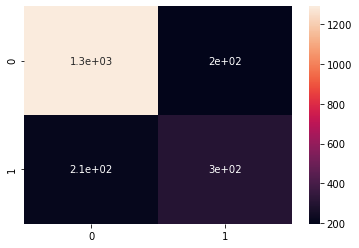

In [23]:
 y_predict_test = classifier.predict(X_test)
new_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(new_matrix, annot=True)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1486
           1       0.61      0.59      0.60       514

    accuracy                           0.80      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.79      0.80      0.80      2000

